In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from datetime import datetime

In [21]:
common_time = 

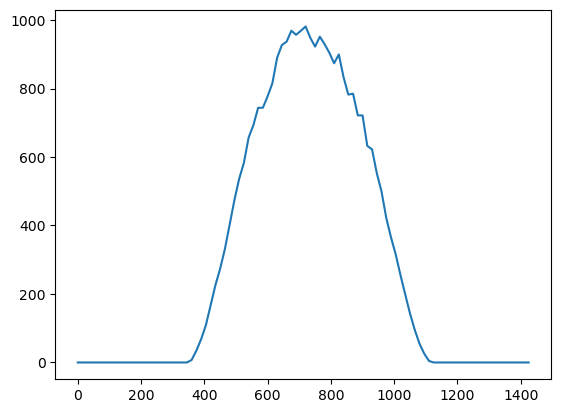

In [134]:
# Solar data 2020-05 - 2020-06
df_solar = pd.read_csv('data/solar_data/Plant_1_Generation_Data.csv',index_col=0,parse_dates=True)
solar_hourly = df_solar.groupby(by=df_solar.index.time)['AC_POWER'].mean()
# solar_hourly.plot()
solar_times = np.array([x.hour*60 + x.minute for x in solar_hourly.index])
solar_values = solar_hourly.values
plt.plot(solar_times,solar_values)
us_solar = UnivariateSpline(solar_times,solar_values)
plt.plot(solar_times,solar_values)

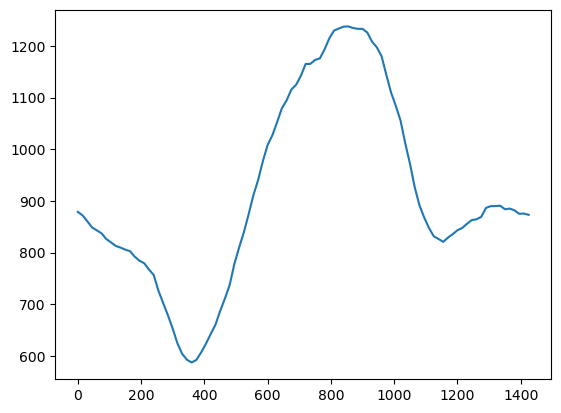

In [138]:
# Wind data
df_wind = pd.read_csv('data/wind_data/50Hertz.csv',index_col=0,parse_dates=True,dayfirst=True)
wind_hourly = df_wind.loc['05/2020':'06/2020',:].mean(axis=0)
# wind_hourly.plot()
wind_times = [datetime.strptime(x, '%H:%M:%S') for x in wind_hourly.index]
wind_times = np.array([x.hour*60 + x.minute for x in wind_times])
# wind_times = np.array([x.hour*60 + x.minute for x in wind_hourly.index])
wind_values = wind_hourly.values * 10
plt.plot(wind_times,wind_values)

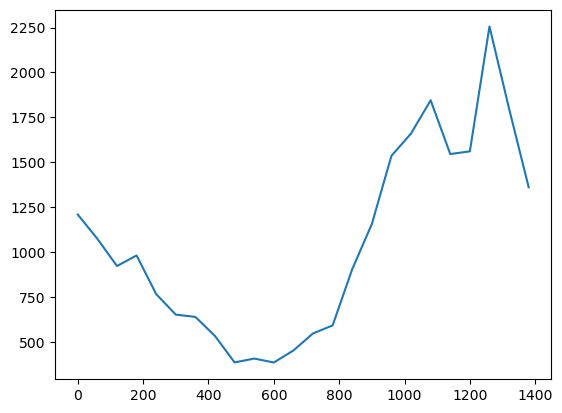

In [137]:
# Residential data
df_house = pd.read_csv('data/residential_energy_data/power_usage_2016_to_2020.csv',index_col=0,parse_dates=True)
df_house = df_house[df_house['notes'] == 'weekday']
df_house = df_house.loc['2019-05':'2019-06',:]
house_hourly = df_house.groupby(by=df_house.index.time)['Value (kWh)'].mean()
# house_hourly.plot()
house_times = np.array([x.hour*60 + x.minute for x in house_hourly.index])
house_values = house_hourly.values * 1000
plt.plot(house_times,house_values)

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425])